In [1]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

warnings.filterwarnings('ignore')
%matplotlib inline

## De que depende la Calidad del Vino Tinto?

- Variables

 - **Fixed acidity** : Cantidad de acido tartico medido en g/dm3
 - **Volatile acidity**: Cantidad de acido acetico medido en g/dm3
 - **Citrid acid**: Cantidad de acido citrico medido en g/dm3
 - **Residual sugar** : Cantidad de azucar despues de la fermentacion medida en g/dm3
 - **Chlorides** : Cantidad de cloruros medido en g/dm3
 - **Free Sulfur Dioxide**: Cantidad de dioxido de azufre medida en g/dm3
 - **Total Sulfur Dioxido**: Cantidad total de azufre en el vino medido en g/dm3
 - **density**: Indica la densidad del vino, medido en g/dm3
 - **ph**: Ph del vino, donde 0 indica ph muy alto y 14 ph basico
 - **slphates** : Cantidad de sulfato de potasio, medido en g/dm3
 - **alcohol** : Indica la cantidad de alcohol
 - **quality** : Indica la calidad del vino en un rango de 0 a 10. El valor 10 indica la mas alta calidad del vino.

In [53]:
# Cargamos la data

df= pd.read_csv("winequality-red.csv",sep=";")
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [54]:
# Tipo de datos de cada columna
df.dtypes

# todas las variables son float(decimales) y solo la variable calidad es del tipo entero.

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [30]:
df.shape

(1599, 12)

In [55]:
# descripcion de la data
df.describe()

# Se observa la cantidad de registro en cada variable es la misma (1599 obs)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [56]:
df.info()
# otra forma de obtener rapidamente info sobre la df.
# no se observan NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Análisis descriptivo

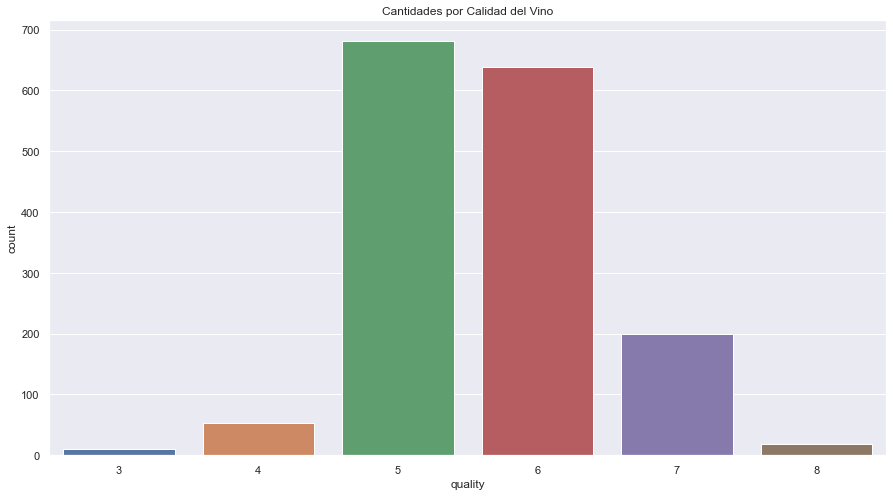

In [57]:
sns.set(rc={'figure.figsize':(15,8)})
p=sns.countplot(df['quality'])
p.set(title = "Cantidades por Calidad del Vino")

plt.show()

# Se observa que hay una mayor frecuencia de vinos entre la calidad 5 y 6.-

In [58]:
t_frec = df.groupby('quality')['quality'].count()
t_frec

# Se confirma la mayor frecuencia para los vinos 5 y 6
# ademas se evidencia que no existen vinos con calidad 1,2,9 y 10.-

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:>

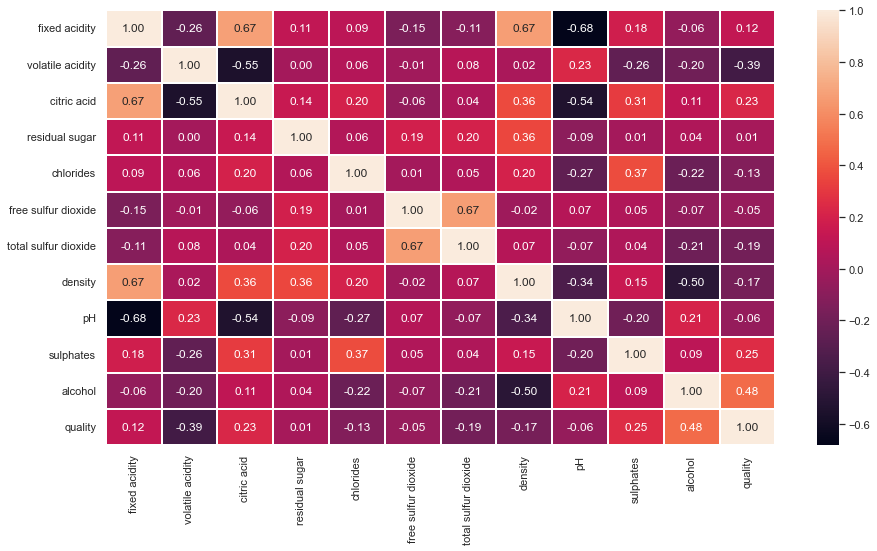

In [59]:
# Examinemos la correlacion

sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

# Resultados

# La calidad tiene correlacion con el acohol (0.48), con el sulfato (0.25),
# con el grado de acido citrico (0.23) y fixed acidity (0.12).

# La calidad tiene una correlacion negativa con volaite acidity (-0.39)


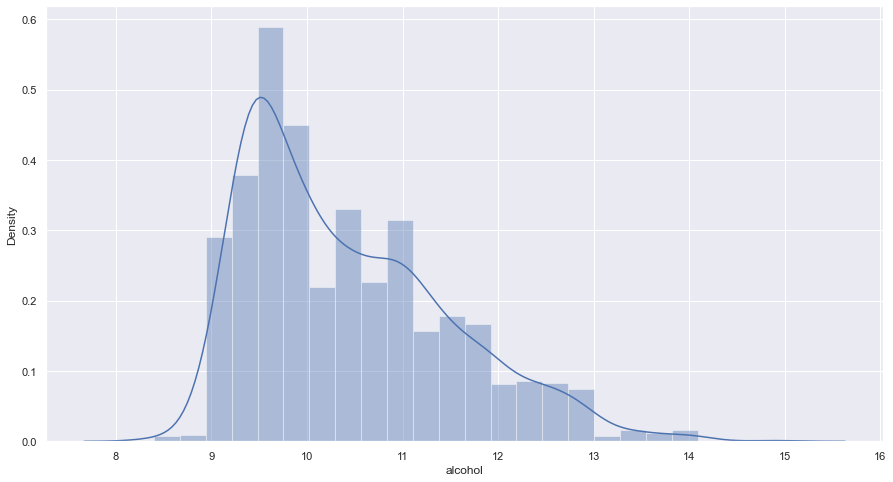

In [61]:
# Analisis de la densidad del Alcohol

sns.distplot(df['alcohol'])
plt.show()

# podemos ver que la distribución del alcohol está positivamente sesgada con la calidad del vino.

In [62]:
skew(df['alcohol'])

# EL resultado confirma lo sesgado del acohol con la calidad del vino.

# podriamos hacer el mismo ejercicio con las demas variables.

0.8600210646566755

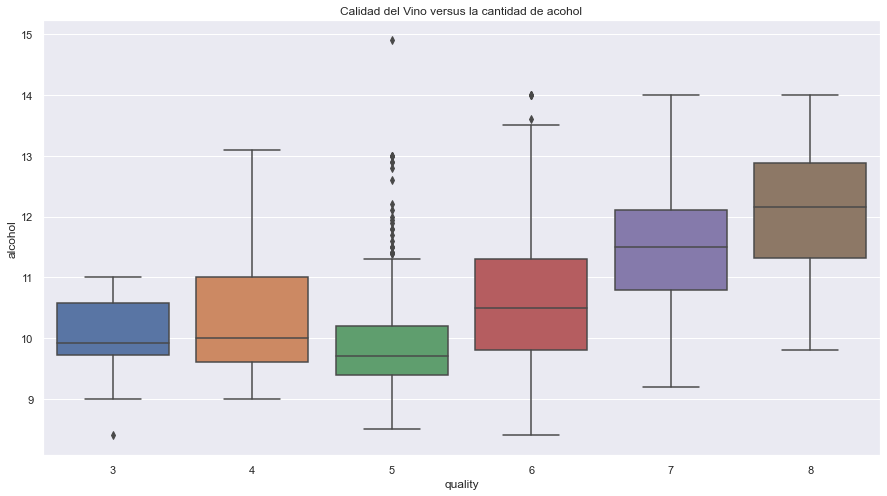

In [63]:
# Alcohol vs Calidad

p=sns.boxplot(x = 'quality', y = 'alcohol', data=df)
p.set(title = "Calidad del Vino versus la cantidad de acohol")
plt.show()

# Se observa que la calidad del vino en 5 y 6 presentan datos atipicos.

# para corregir este hecho podriamos apartalos y volver a realizar el grafico

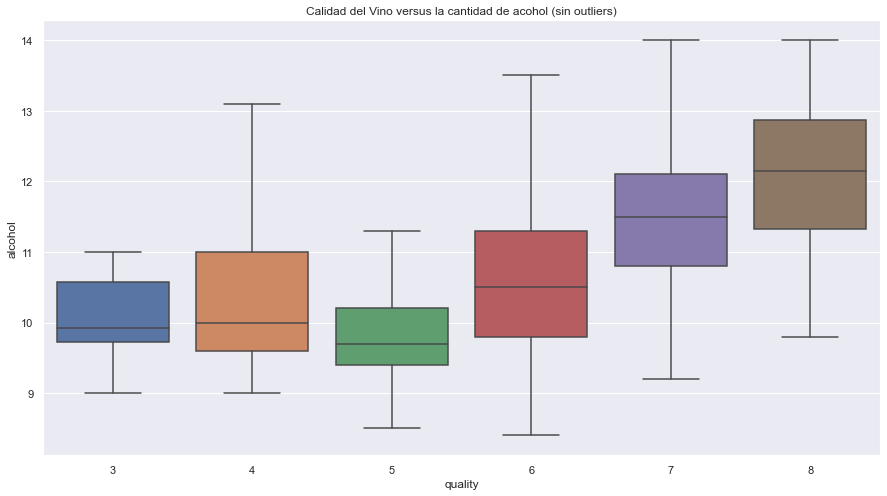

In [64]:
# Indicamos que no muestre los outliers

p=sns.boxplot(x = 'quality', y = 'alcohol', data=df, showfliers=False)
p.set(title = "Calidad del Vino versus la cantidad de acohol (sin outliers)")
plt.show()


# Se observa que a medida que la cantidad de alcohol crece, tambien lo hace la calidad
# del vino.

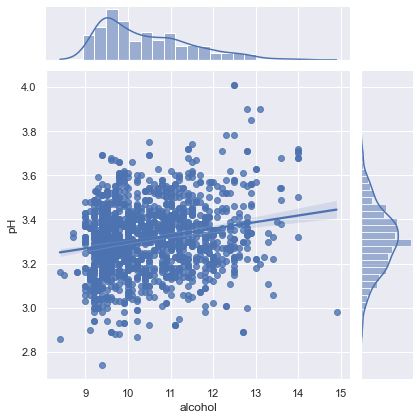

In [65]:
# Alcohol vs Ph

sns.jointplot(x='alcohol',y='pH',data=df, kind='reg')
plt.show()

# Se observa una debil positiva correlacion.

# Cuantificacion de la correlacion utilizando la regresion de Pearson

In [68]:
# Generacion de funcion para encontrar la carrelacion entre 2 columnas

def obtener_correlacion(columna1, columna2, df):
    pearson_corr, p_value = pearsonr(df[columna1], df[columna2])
    print("Correlacion entre {} y {} es {}".format(columna1,
columna2, pearson_corr))
    print("P-value de esta correlacion es {}".format(p_value))

In [69]:
# veamos como funciona
obtener_correlacion('alcohol','pH', df)
# Resultado muy cercano al obtenido por medio del heatmap


Correlacion entre alcohol y pH es 0.20563250850549822
P-value de esta correlacion es 9.96449774146556e-17


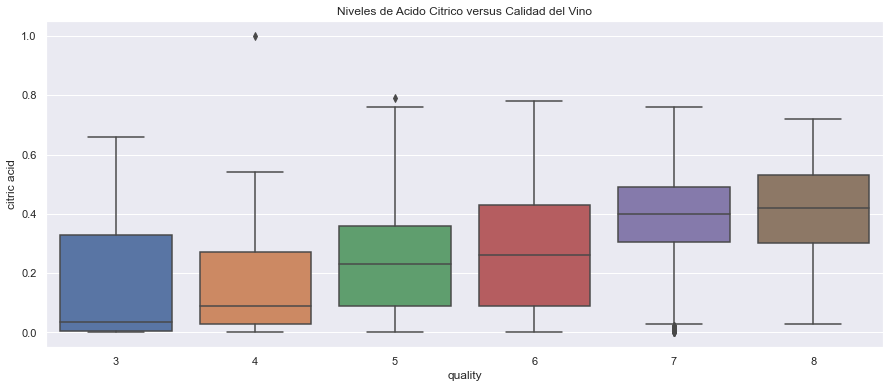

In [70]:
# Analisis Acido citrico 
fig = plt.figure(figsize = (15,6))
p=sns.boxplot(x = 'quality', y = 'citric acid', data = df)
p.set(title = "Niveles de Acido Citrico versus Calidad del Vino")
plt.show()
# Se observa que a medida que aumenta la cantidad de acido citrico, aumenta la calidad del vino

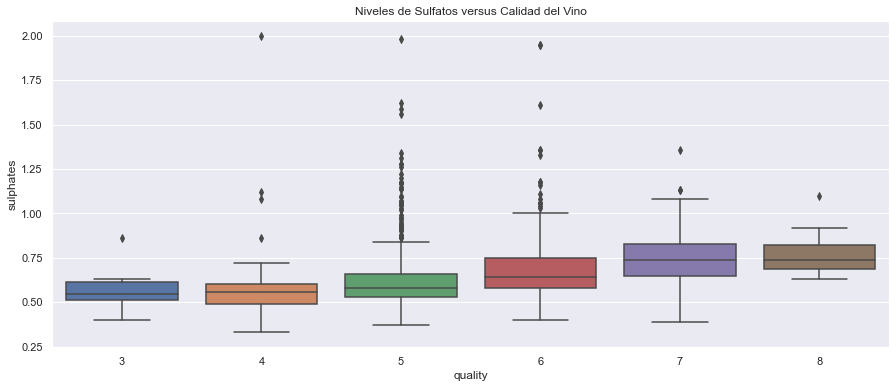

In [72]:
# Analisis Sulfato
fig = plt.figure(figsize = (15,6))
p=sns.boxplot(x = 'quality', y = 'sulphates', data = df)
p.set(title = "Niveles de Sulfatos versus Calidad del Vino")
plt.show()
# Se observa que a medida que aumenta la cantidad de sulfatos, aumenta la calidad del vino, aunque menor medida que los niveles de acido citrico
# se observa una gran cantidad de outliers

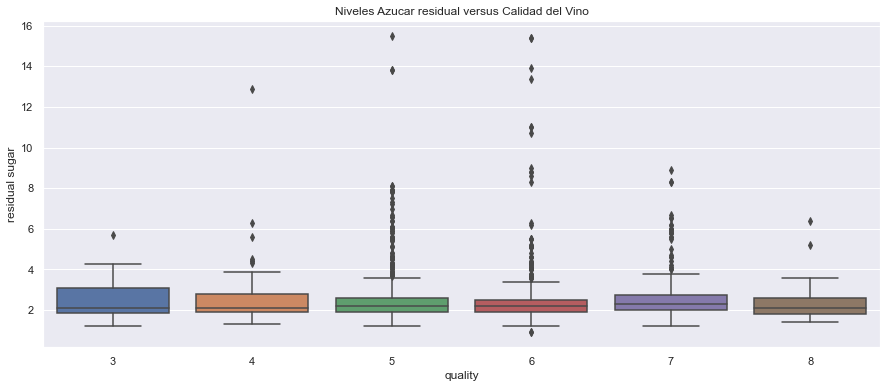

In [73]:
# Analisis Residual sugar
fig = plt.figure(figsize = (15,6))
p=sns.boxplot(x = 'quality', y = 'residual sugar', data = df)
p.set(title = "Niveles Azucar residual versus Calidad del Vino")
plt.show()
# No se observa que los niveles de azucar residual influyan en la calidad del vino (tienen el mismo nivel) 
# se observa una gran cantidad de outliers

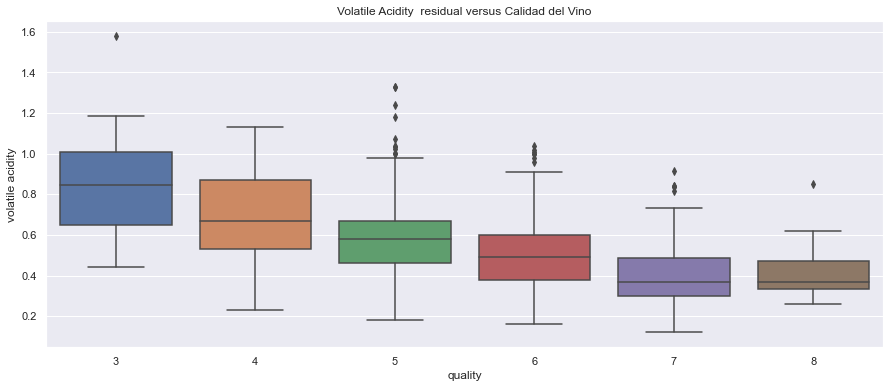

In [75]:
# Analisis Volaite Acidity 
fig = plt.figure(figsize = (15,6))
p=sns.boxplot(x = 'quality', y = 'volatile acidity', data = df)
p.set(title = "Volatile Acidity  residual versus Calidad del Vino")
plt.show()
# Se observa una relación negativa, es decir, a mayores niveles Volaite Acidity menor es la calidad del vino
# se observa una gran cantidad de outliers

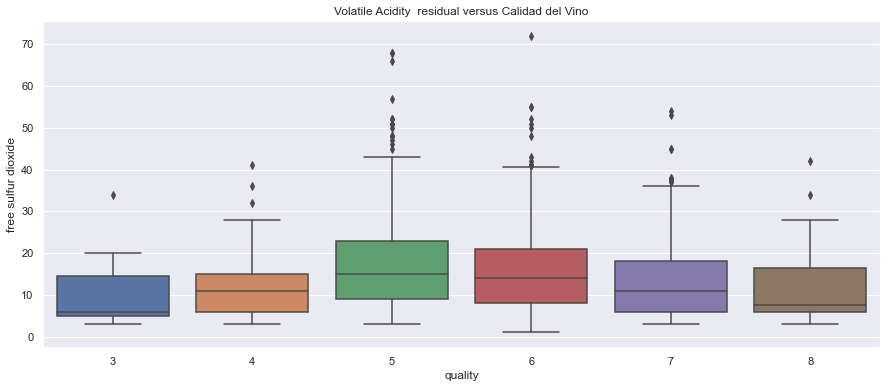

In [77]:
# Analisis Free Sulfur Dioxide
fig = plt.figure(figsize = (15,6))
p=sns.boxplot(x = 'quality', y = 'free sulfur dioxide', data = df)
p.set(title = "Volatile Acidity  residual versus Calidad del Vino")
plt.show()
# no se observa claramente una relacion con la calidad del vino
# se observa una gran cantidad de outliers

### Predicción de la Calidad del Vino

In [78]:
# Desde calidad 7 hacia arriba se califica como Bueno, en caso contrario, Malo
bins = (2, 6.5, 8)
group_names = [0, 1]
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

# Se crea la variable que determina que 0 es mala y 1 buena calidad

In [79]:
# Conteo de casos
df['quality'].value_counts(normalize=True)

# El 13.57% corresponde a vinos de buena calidad

0    0.86429
1    0.13571
Name: quality, dtype: float64

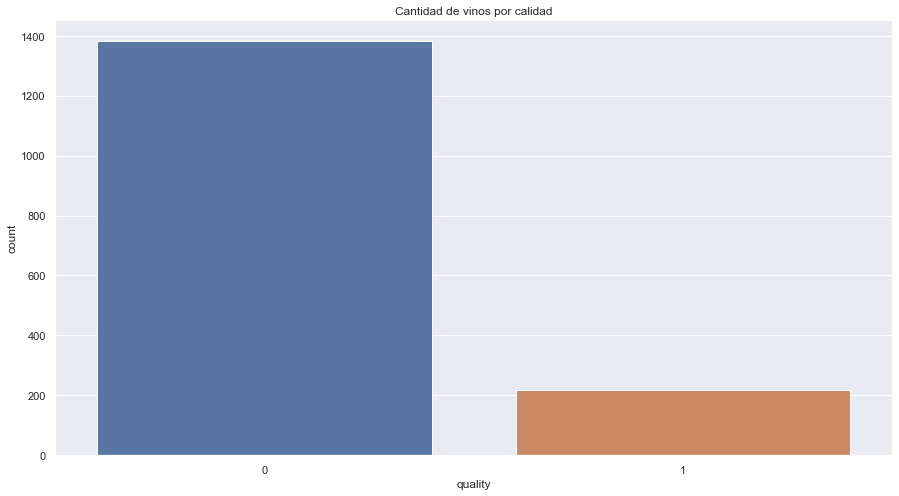

In [80]:
# grafico de clases de vino
p = sns.countplot(df['quality'])
p.set(title = "Cantidad de vinos por calidad")
plt.show()


In [81]:
# Separación de la data
X = df.drop('quality', axis = 1)
y = df['quality'] # variable objetivo


# train y Test data
# se utiliza el 20% para el test, y con un numero aleatorio 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
# Para obtener resultados optimizados
sc = StandardScaler()

In [83]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## **Ahora se puede utilizar algun algoritmo de clasificación**


1 - **Randon Forest**


In [84]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [85]:
# observamos el comportamiendo del modelo
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.77      0.68      0.71       320
weighted avg       0.86      0.88      0.87       320



In [86]:
# matriz de confusión
print(confusion_matrix(y_test,pred_rfc))

[[262  11]
 [ 28  19]]


 El Algoritmo **random forest** tiene una eficiencia del **86%**

2 - **Stochastic Gradient Decent Classifier**

In [87]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [88]:
# resultados
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       273
           1       0.43      0.49      0.46        47

    accuracy                           0.83       320
   macro avg       0.67      0.69      0.68       320
weighted avg       0.84      0.83      0.84       320



In [12]:
print(confusion_matrix(y_test, pred_sgd))

[[268   5]
 [ 42   5]]


El Algoritmo **Stochastic Gradient Decent** tiene una eficiencia del **83%**

- **Support Vector Classifier**

In [89]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [90]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [91]:
print(confusion_matrix(y_test, pred_svc))

[[268   5]
 [ 35  12]]


El Algoritmo **Support Vector** tiene una eficiencia del **86%**

**Como podemos aumentar la eficiencia de los algoritmos**

A - Utilizando una grilla para encontrar los mejores parametros en SVM


In [28]:
# Grilla
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [29]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [30]:
# mejores parametros
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [31]:
# ahora los utilizamos y observamos el accuracy
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



Un gran avance, pasamos del **86%** al **90%** utilizando los mejores parametros encontrados.

**B** - Validación Cruzada para **Random Forest** y **SGD**

Procedimiento de “re-sampling” (remuestreo) que permite evaluar un modelo.  Se utiliza para comparar los diferentes modelos y seleccionar el más adecuado para un problema específico. Esta técnica que tiene menos sesgos que los demás métodos. 

In [92]:
# Para Random Forest
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9124507874015748

Aumentamos del **86%** al **91%** utilizando validacion cruzada.

In [93]:
# SGD
sgd_eval = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = 10)
sgd_eval.mean()


0.8585014763779528

Aumentamos del **81%** al **85%** utilizando validacion cruzada.